3.141592653589793 3.1622776601683795 100.65842420897408
17.78279410038923 3.1622776601683795
[ 106.96229452 -204.47912608  100.65842421] [ 1. -1.]


(6.388267651416531e-08, 0.5)

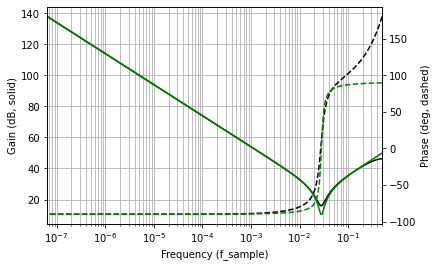

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

z = 2*np.pi

# poles, "gain limit frequency"
r = 1e-6*z*0
# zeros, "gains at unit frequency"
kp, ki, kd = 10**.5, 10**0*z/2, 10**2.5/z*2

print(ki,kp,kd)

print(np.sqrt(ki*kd), kp)

f = 2**-np.arange(1, 24, .1)
w = z*f

#b = ki*np.r_[1, 1, 1]/3 + kp*np.r_[1, 0, -1]/2 + kd*np.r_[1, -2, 1]
b = ki*np.r_[1, 0, 0] + kp*np.r_[1, -1, 0] + kd*np.r_[1, -2, 1]
a = np.r_[1, -(1 - r)]  # I, P, D
# a = np.r_[1, -2*(1 - r), (1 - r)**2]/z  # II, I, P
print(b, a)
s = signal.TransferFunction(b, a, dt=1.)
w_, mag, phase = s.bode(w)

h = (ki + kp*1j*w + kd*(1j*w)**2)
h /= (r + 1j*w)**1  # I, P, D
# h /= (r + 1j*w)**2/z  # II, I, P
mag1 = 20*np.log10(np.absolute(h))
phase1 = np.rad2deg(np.unwrap(np.angle(h)))

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(f, mag, "k-", f, mag1, "g-")
ax1.plot(f, phase, "k--", f, phase1, "g--")
#ax.plot(f, mag - mag1, "k-")
#ax1.plot(f, phase - phase1, "k--")
ax.set_xscale("log")
ax.set_xlabel("Frequency (f_sample)")
ax.set_ylabel("Gain (dB, solid)")
ax1.set_ylabel("Phase (deg, dashed)")
ax.grid(which="both")
ax.set_xlim(f.min(), .5)
#ax.set_ylim(-.5, .5)
#ax1.set_ylim(-10, 10)